In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from datetime import datetime 
import warnings
from pylab import mpl
import pylab as pl
warnings.filterwarnings('ignore')
plt.rcParams["font.sans-serif"]=["SimHei"]#显示汉字
plt.rcParams["axes.unicode_minus"]=False
%matplotlib inline

In [2]:
traffic = pd.read_csv('data_traffic.csv',low_memory=True)
traffic = traffic.drop('Unnamed: 0',axis=1)

In [3]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5770 entries, 0 to 5769
Data columns (total 22 columns):
PM2.5              5770 non-null int64
PM10               5770 non-null int64
HCHO               5770 non-null float64
VOC                5770 non-null float64
O3                 5770 non-null object
Temp               5770 non-null int64
Humidity           5770 non-null int64
AQI                5770 non-null int64
Wind_Orient        5770 non-null object
Wind_Level         5770 non-null object
Location           5770 non-null object
Type               5770 non-null object
Zone               5770 non-null object
Date               5770 non-null object
Time               5770 non-null object
Info_source        5770 non-null object
PM2.5_level        5770 non-null object
Temp_Level         5770 non-null object
PM2.5_threshold    5770 non-null object
Time_Tags          5770 non-null object
Day_tags           5770 non-null object
Title              5524 non-null object
dtypes: float64(

In [4]:
traffic.head()

,PM2.5,PM10,HCHO,VOC,O3,Temp,Humidity,AQI,Wind_Orient,Wind_Level,...,Zone,Date,Time,Info_source,PM2.5_level,Temp_Level,PM2.5_threshold,Time_Tags,Day_tags,Title
0,30,45,0.000,0.0,51,13,74,15,东北风,3-4级,...,思明,2019-01-02,08:24:00,device,Good,"(10, 20]",under,Morning,W,火车站
1,22,30,0.002,0.0,51,13,74,15,东北风,3-4级,...,思明,2019-01-02,08:25:00,device,Good,"(10, 20]",under,Morning,W,火车站
2,27,36,0.028,0.0,51,13,74,15,东北风,3-4级,...,思明,2019-01-02,08:26:00,device,Good,"(10, 20]",under,Morning,W,火车站
3,23,35,0.018,0.0,51,13,74,15,东北风,3-4级,...,思明,2019-01-02,08:27:00,device,Good,"(10, 20]",under,Morning,W,火车站
4,19,30,0.023,0.0,51,13,74,15,东北风,3-4级,...,思明,2019-01-02,08:28:00,device,Good,"(10, 20]",under,Morning,W,火车站


In [5]:
traffic.describe()

,PM2.5,PM10,HCHO,VOC,Temp,Humidity,AQI
count,5770.000000,5770.000000,5770.000000,5770.000000,5770.000000,5770.000000,5770.000000
mean,42.777990,67.036915,0.011645,0.726363,17.118544,80.931023,48.644021
std,26.023166,36.756245,0.015081,3.506227,2.614111,10.912045,19.805392
min,4.000000,7.000000,0.000000,0.000000,10.000000,53.000000,14.000000
25%,23.000000,37.000000,0.000000,0.017000,15.000000,72.000000,31.000000
50%,39.000000,62.000000,0.003000,0.050000,17.000000,79.000000,48.000000
75%,57.000000,87.000000,0.021000,0.120000,19.000000,90.000000,59.000000
max,169.000000,235.000000,0.131000,77.000000,23.000000,100.000000,124.000000


In [6]:
traffic[['Zone','Title','Temp']].groupby(['Zone','Title']).count()

Temp
Zone Title        
同安   西柯        180
思明   东芳山庄      180
     二市        258
     前埔        134
     卧龙晓城      250
     厦门站       210
     开禾路口       90
     思北站       168
     文灶        270
     斗西路       258
     梧村汽车站      60
     洪文        342
     火车站       270
     第一码头站      60
     莲坂        252
     龙山桥       252
湖里   东芳山庄       90
     县后        180
     双十中学      150
     吕厝        180
     官任          2
     市行政服务中心   270
     枋湖客运中心     30
     蔡塘        270
     金山        270
集美   厦门北       176
     厦门北站      234
     嘉庚体育馆     290
     官任        148

## 异常点处理

异常点原因分析：
1. 仪器偏差
2. 测量环境条件瞬时变化，如过往行人使用香水、发胶等
3. 路经烧烤摊
4. 。。。

设定规则： 剔除远离数据群的离散点

Text(0.5, 1.0, '交通：不同区域、时段与PM2.5数值分布关系图')

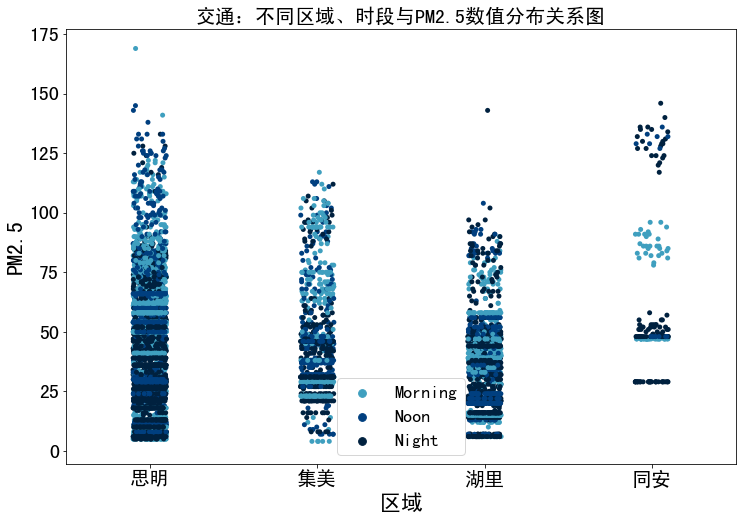

In [7]:
plt.figure(figsize=(12,8))
# sns.set_palette('ocean_r')
ax=sns.stripplot(x='Zone',y='PM2.5',hue='Time_Tags',jitter=True,data=traffic,palette='ocean_r')
ax.set_xlabel('区域',fontsize=22)
ax.set_ylabel('PM2.5',fontsize=22)
ax.legend(fontsize=18)
# plt.legend(('早','午','晚'),loc='best',fontsize=18)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('交通：不同区域、时段与PM2.5数值分布关系图',fontsize=20)
# plt.savefig('异常点处理——交通：不同区域、时段与PM2.5数值分布关系图.jpg',dpi=400)

In [8]:
traffic[traffic['PM2.5']>150]

,PM2.5,PM10,HCHO,VOC,O3,Temp,Humidity,AQI,Wind_Orient,Wind_Level,...,Zone,Date,Time,Info_source,PM2.5_level,Temp_Level,PM2.5_threshold,Time_Tags,Day_tags,Title
992,169,193,0.0,0.57,29,16,85,68,东南风,微风,...,思明,2019-03-02,08:19:00,device,Terrible,"(10, 20]",above,Morning,R,斗西路


In [9]:
traffic[traffic['Zone']=='湖里'][traffic['PM2.5']>120]

,PM2.5,PM10,HCHO,VOC,O3,Temp,Humidity,AQI,Wind_Orient,Wind_Level,...,Zone,Date,Time,Info_source,PM2.5_level,Temp_Level,PM2.5_threshold,Time_Tags,Day_tags,Title
2111,143,235,0.052,0.132,19,21,72,59,东北风,3-4级,...,湖里,2018-12-11,11:17:00,device,Terrible,"(20, 30]",above,Night,W,吕厝


In [10]:
traffic = traffic.drop(index=[992,2111],axis=0)

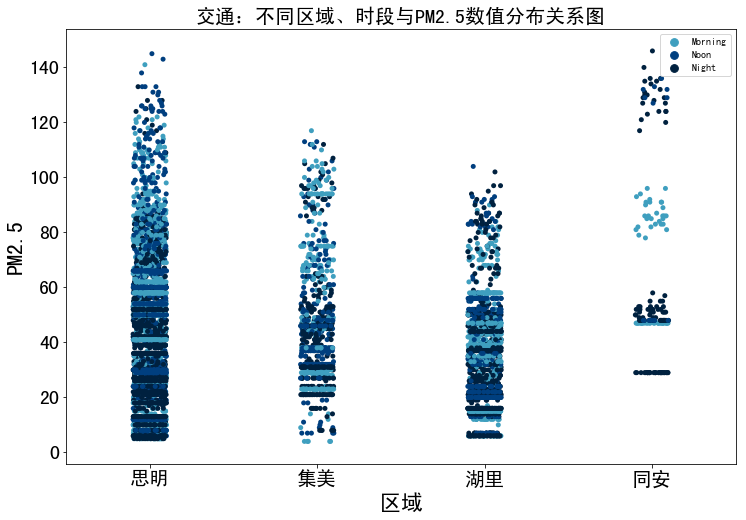

In [11]:
plt.figure(figsize=(12,8))
ax=sns.stripplot(x='Zone',y='PM2.5',hue='Time_Tags',jitter=True,data=traffic,palette='ocean_r')
ax.set_xlabel('区域',fontsize=22)
ax.set_ylabel('PM2.5',fontsize=22)
ax.legend(fontsize=18)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('交通：不同区域、时段与PM2.5数值分布关系图',fontsize=20)
plt.legend(loc='best')
# plt.savefig('交通：不同区域、时段与PM2.5数值分布关系图.jpg',dpi=400)

## 3.4 交通测量、发布数据的切分

In [12]:
traffic_device = traffic[traffic['Info_source']=='device']
traffic_public = traffic[traffic['Info_source']=='public']

In [13]:
print(len(traffic_device[(traffic_device['PM2.5']>=35)]))#测试设备测得的交通PM2.5数值大于35的数量
print(len(traffic_device[(traffic_device['PM2.5']<35)]))#测试设备测得的交通PM2.5数值小于35的数量
print(len(traffic_public[(traffic_public['PM2.5']>=35)]))
print(len(traffic_public[(traffic_public['PM2.5']<35)]))

2217
666
1117
1768


Text(0.5, 0, 'Traffic Air Test Quality')

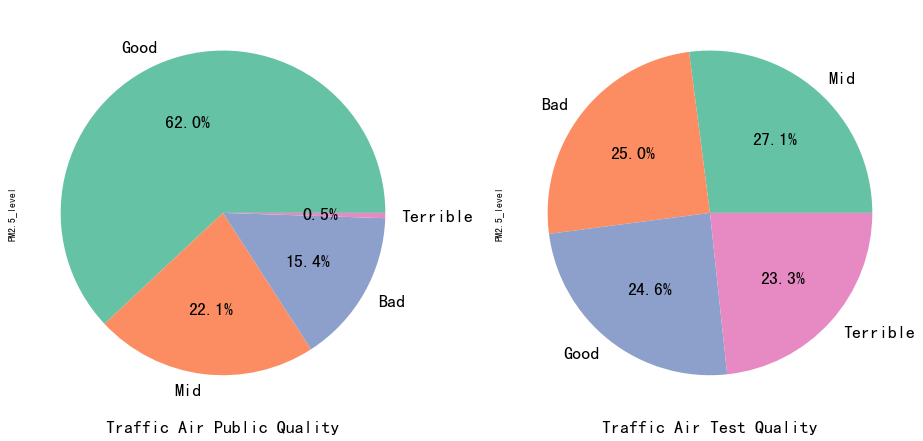

In [14]:
plt.figure(figsize=(16,8))
sns.set_palette('Set2')
plt.subplot(121)
traffic_public['PM2.5_level'].value_counts().plot.pie(autopct="%1.1f%%",fontsize=18)
plt.xlabel('Traffic Air Public Quality',fontsize=18)
plt.subplot(122)
traffic_device['PM2.5_level'].value_counts().plot.pie(autopct="%1.1f%%",fontsize=18)
plt.xlabel('Traffic Air Test Quality',fontsize=18)
# plt.savefig('不同数据源PM2.5质量等级饼状图.jpg',dpi=400)

<Figure size 864x576 with 0 Axes>

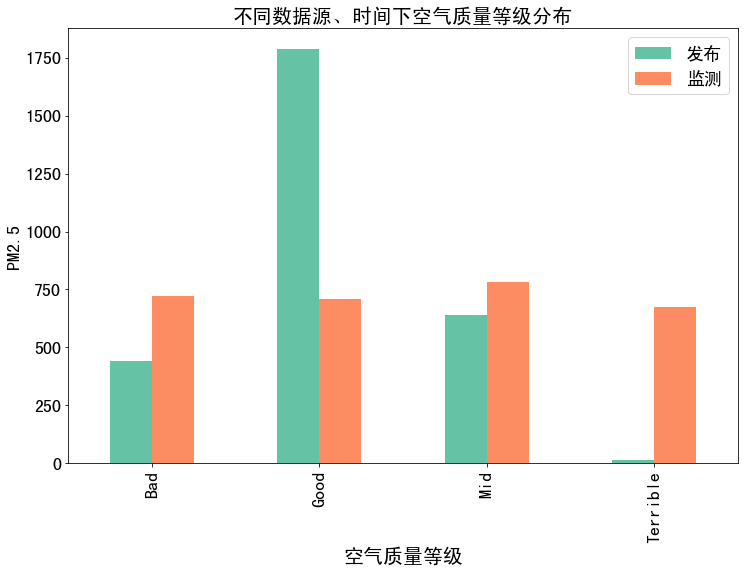

In [15]:

fig = plt.figure(figsize=(12,8))
fig.set(alpha=0.2)  # 设定图表颜色alpha参数

public = traffic_public['PM2.5_level'].value_counts()
device = traffic_device['PM2.5_level'].value_counts()
df=pd.DataFrame({u'发布':public, u'监测':device})
df.plot(kind='bar', stacked=False,figsize=(12,8))
plt.title(u"不同数据源、时间下空气质量等级分布",fontsize=20)
plt.xlabel(u"空气质量等级",fontsize=20) 
plt.ylabel(u"PM2.5",fontsize=18) 
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(fontsize=18)

# plt.savefig('不同数据源、时间下空气质量等级分布.jpg',dpi=400)

Text(0.5, 1.0, 'PM2.5/PM10浓度分布')

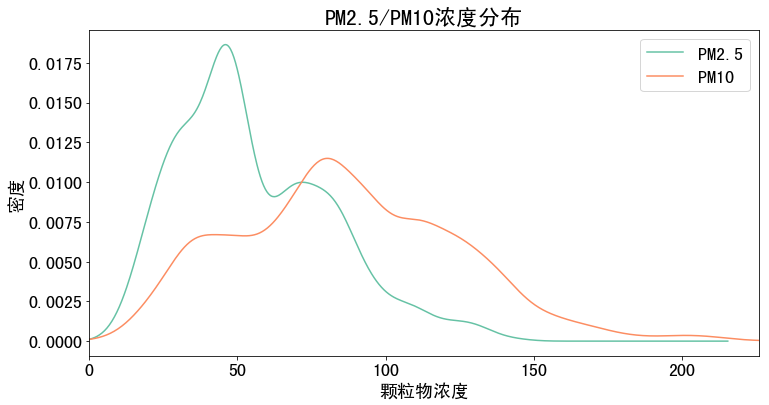

In [16]:
plt.figure(figsize=(12,6))
traffic_device['PM2.5'].plot(kind='kde',xlim=(0,traffic['PM2.5'].max()))
traffic_device['PM10'].plot(kind='kde',xlim=(0,traffic['PM10'].max()))
plt.legend(('PM2.5','PM10'),loc='best',fontsize=18)
plt.xlabel(u"颗粒物浓度",fontsize=18)# plots an axis lable
plt.ylabel(u"密度",fontsize=18) 
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title(u"PM2.5/PM10浓度分布",fontsize=22)
# plt.savefig('PM2.5_PM10浓度分布.jpg',dpi=400)

Text(0.5, 1.0, '设备：PM2.5不同区域浓度分布')

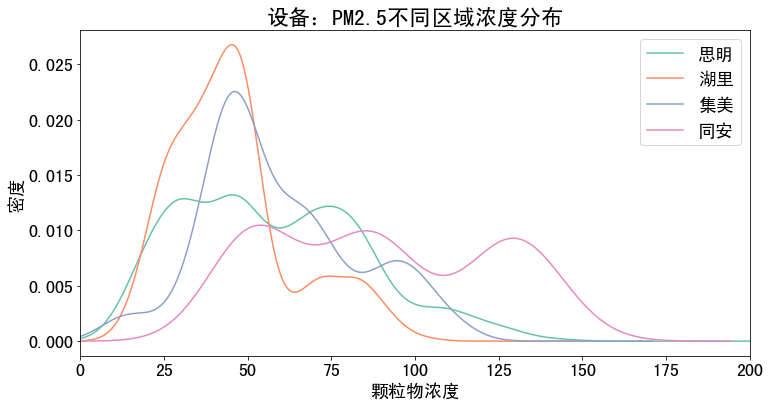

In [17]:
plt.figure(figsize=(12,6))

traffic_device[traffic_device['Zone']=='思明']['PM2.5'].plot(kind='kde',xlim=(0,200))
traffic_device[traffic_device['Zone']=='湖里']['PM2.5'].plot(kind='kde')
traffic_device[traffic_device['Zone']=='集美']['PM2.5'].plot(kind='kde')
traffic_device[traffic_device['Zone']=='同安']['PM2.5'].plot(kind='kde')

plt.legend(('思明','湖里','集美','同安'),loc='best',fontsize=18)
plt.xlabel(u"颗粒物浓度",fontsize=18)# plots an axis lable
plt.ylabel(u"密度",fontsize=18) 
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title(u"设备：PM2.5不同区域浓度分布",fontsize=22)
# plt.savefig('设备：PM2.5不同区域浓度分布.jpg',dpi=400)

Text(0.5, 1.0, '不同数据源下，PM2.5的数值分布')

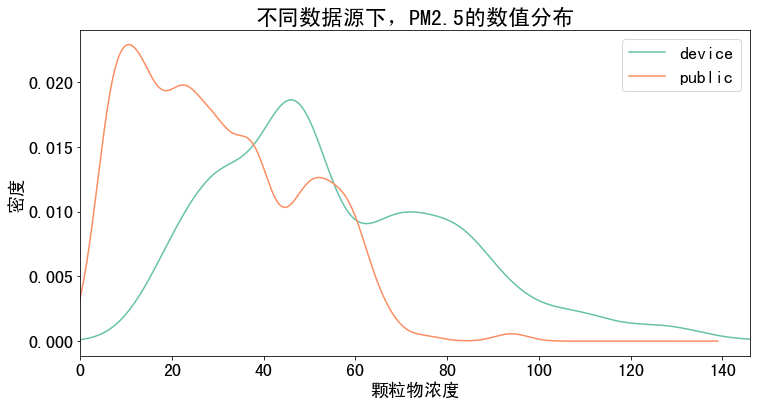

In [18]:
"""不同数据源下，PM2.5的数值分布（kdeplot）"""
plt.figure(figsize=(12,6))
traffic_device['PM2.5'].plot(kind='kde',xlim=(0,traffic['PM2.5'].max()))
traffic_public['PM2.5'].plot(kind='kde',xlim=(0,traffic['PM2.5'].max()))
plt.legend(('device','public'),loc='best',fontsize=18)
plt.xlabel(u"颗粒物浓度",fontsize=18)# plots an axis lable
plt.ylabel(u"密度",fontsize=18) 
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title(u"不同数据源下，PM2.5的数值分布",fontsize=22)
# plt.savefig('不同数据源下，PM2.5的数值分布.jpg',dpi=400)

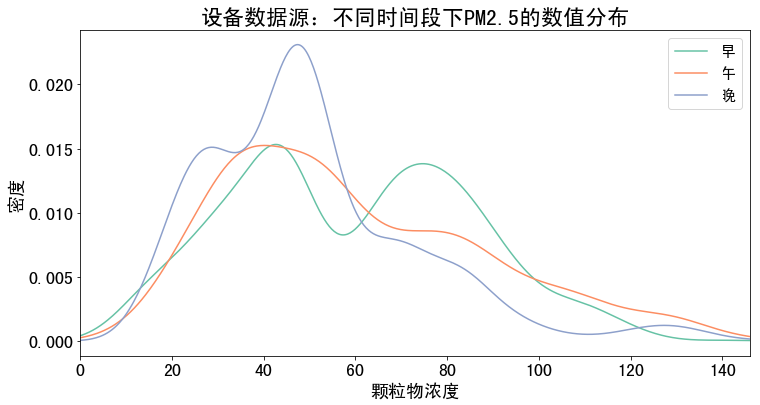

In [19]:
"""设备数据源：不同时间段下PM2.5的数值分布（kdeplot）"""
plt.figure(figsize=(12,6))
traffic_device[traffic_device['Time_Tags']=='Morning']['PM2.5'].plot(kind='kde',xlim=(0,traffic['PM2.5'].max()))
traffic_device[traffic_device['Time_Tags']=='Noon']['PM2.5'].plot(kind='kde')
traffic_device[traffic_device['Time_Tags']=='Night']['PM2.5'].plot(kind='kde')

plt.legend(('早','午','晚'),loc='best',fontsize=16)
plt.xlabel(u"颗粒物浓度",fontsize=18)# plots an axis lable
plt.ylabel(u"密度",fontsize=18) 
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title(u"设备数据源：不同时间段下PM2.5的数值分布",fontsize=22)
# plt.savefig('设备数据源：不同时间段下PM2.5的数值分布.jpg',dpi=400)
# 下图意义不大，研究不同时间段下PM2.5数值分布使用'barplot'更适合

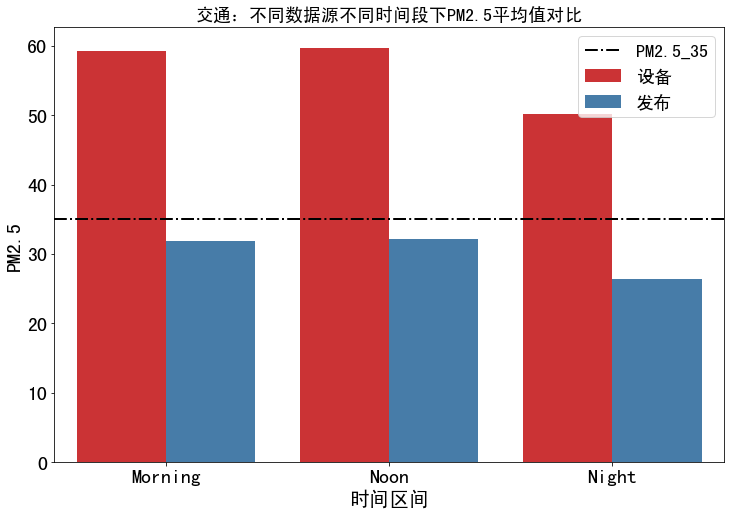

In [20]:
fig, axis1 = plt.subplots(1,1,figsize=(12,8))
# plt.grid(linestyle="--")
# av = traffic[["PM2.5", "Time_Tags"]].groupby(['Time_Tags'],as_index=False).mean()
ax = sns.barplot(x='Time_Tags', y='PM2.5',hue='Info_source',data = traffic,order=['Morning','Noon','Night'],ci=None,palette="Set1")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
# ax.set_xlabel("Time_episode",fontsize=20)
ax.set_xlabel("时间区间",fontsize=20)
ax.set_ylabel("PM2.5",fontsize=20)
plt.axhline(y=35,c='black',ls='-.',lw='2')
# ax.legend({'35':'e','Public':'ie','Device':'ooe'},fontsize=18)
ax.legend({'PM2.5_35':'e','设备':'设备','发布':'发布'},fontsize=18)
plt.title('交通：不同数据源不同时间段下PM2.5平均值对比',loc='center',fontsize=18)
# plt.savefig('不同数据源不同时间段下PM2.5平均值对比.jpg',dpi=400)

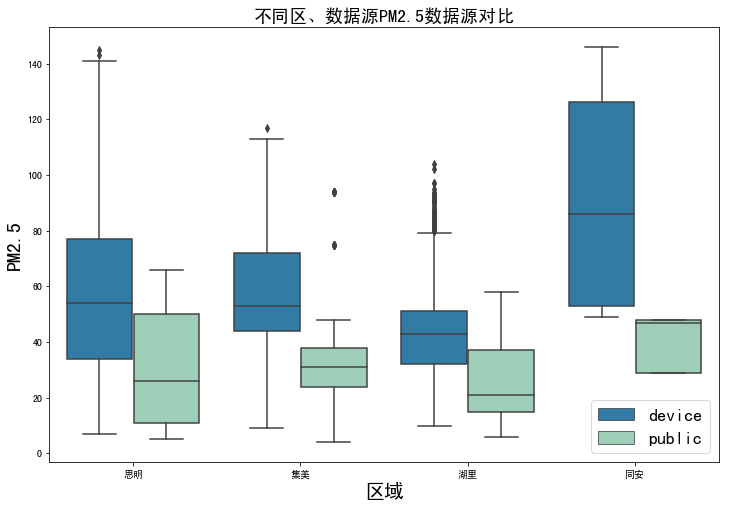

In [21]:
plt.figure(figsize=(12,8))
ax = sns.boxplot('Zone','PM2.5',hue='Info_source',data=traffic, palette="YlGnBu_r")
# plt.xticks(fontsize=20)
# plt.yticks(fontsize=20)
plt.title('不同区、数据源PM2.5数据源对比',fontsize=18)
ax.set_xlabel("区域",fontsize=20)
ax.set_ylabel("PM2.5",fontsize=20)
ax.legend(fontsize=18)

# plt.margins(0,0)
# plt.savefig('btq.jpg',dpi=400,pad_inches = 0,bbox_inches = 'tight')
# plt.savefig('不同区、数据源PM2.5数据源对比.jpg',dpi=400)

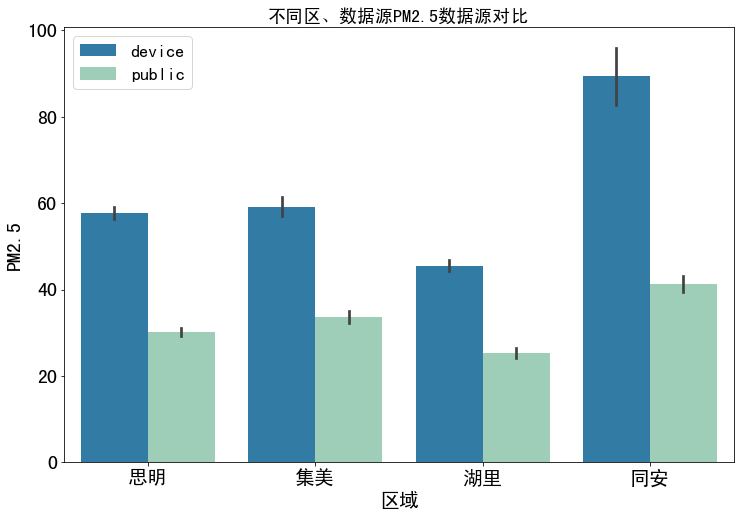

In [22]:
plt.figure(figsize=(12,8))
ax = sns.barplot('Zone','PM2.5',hue='Info_source',data=traffic, palette="YlGnBu_r")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('不同区、数据源PM2.5数据源对比',fontsize=18)
ax.set_xlabel("区域",fontsize=20)
ax.set_ylabel("PM2.5",fontsize=20)
ax.legend(fontsize=18)

# plt.margins(0,0)
# plt.savefig('btq.jpg',dpi=400,pad_inches = 0,bbox_inches = 'tight')
# plt.savefig('不同区PM2.5数据源对比.jpg',dpi=400)

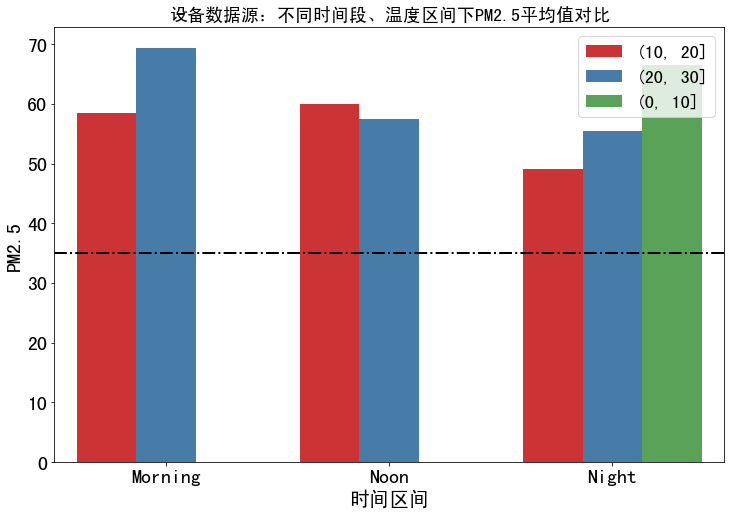

In [23]:
fig, axis1 = plt.subplots(1,1,figsize=(12,8))
ax = sns.barplot(x='Time_Tags', y='PM2.5',hue='Temp_Level',data = traffic_device,order=['Morning','Noon','Night'],ci=None,palette="Set1")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.set_xlabel("时间区间",fontsize=20)
ax.set_ylabel("PM2.5",fontsize=20)
plt.axhline(y=35,c='black',ls='-.',lw='2')
plt.legend(fontsize=18,loc='best')
plt.title('设备数据源：不同时间段、温度区间下PM2.5平均值对比',loc='center',fontsize=18)
# plt.savefig('设备数据源：不同时间段、温度区间下PM2.5平均值对比.jpg',dpi=400)

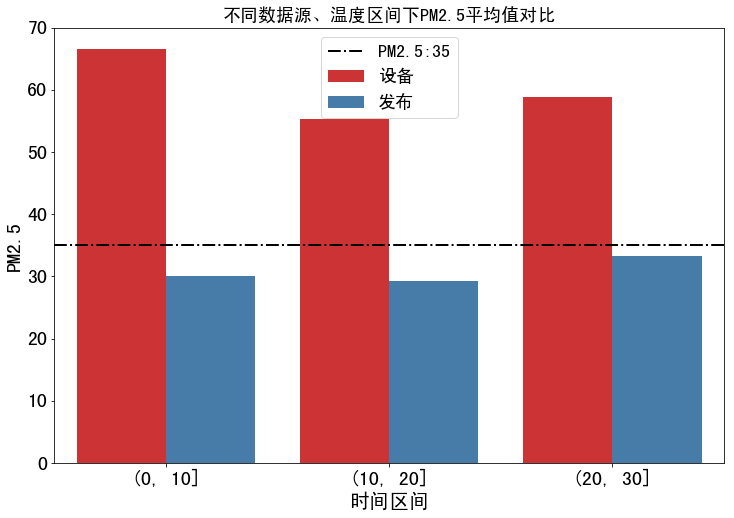

In [24]:
fig, axis1 = plt.subplots(1,1,figsize=(12,8))
ax = sns.barplot(x='Temp_Level', y='PM2.5',hue='Info_source',data = traffic,order=['(0, 10]','(10, 20]', '(20, 30]'],ci=None,palette="Set1")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.set_xlabel("时间区间",fontsize=20)
ax.set_ylabel("PM2.5",fontsize=20)
plt.axhline(y=35,c='black',ls='-.',lw='2')
ax.legend({'PM2.5:35':'e','设备':'设备','发布':'发布'},fontsize=18,loc='best')
plt.title('不同数据源、温度区间下PM2.5平均值对比',loc='center',fontsize=18)
# plt.savefig('不同数据源、温度区间下PM2.5平均值对比.jpg',dpi=400)

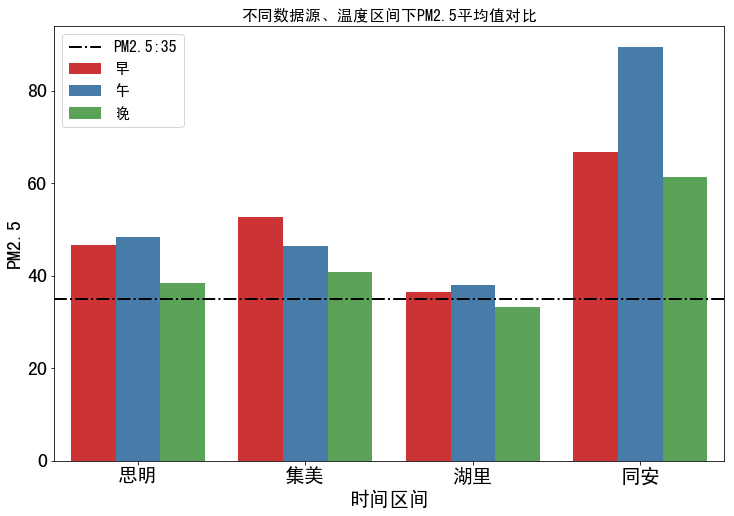

In [25]:
fig, axis1 = plt.subplots(1,1,figsize=(12,8))
ax = sns.barplot(x='Zone', y='PM2.5',hue='Time_Tags',data = traffic,ci=None,palette="Set1")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.set_xlabel("时间区间",fontsize=20)
ax.set_ylabel("PM2.5",fontsize=20)
plt.axhline(y=35,c='black',ls='-.',lw='2')
# ax.legend(fontsize=18,loc='best')
plt.legend(('PM2.5:35','早','午','晚'),loc='best',fontsize=16)
plt.title('不同数据源、温度区间下PM2.5平均值对比',loc='center',fontsize=16)
# plt.savefig('不同数据源_温度区间下PM2.5平均值对比.jpg',dpi=400)

In [26]:
traffic['Temp_Level'].unique()

array(['(10, 20]', '(20, 30]', '(0, 10]'], dtype=object)

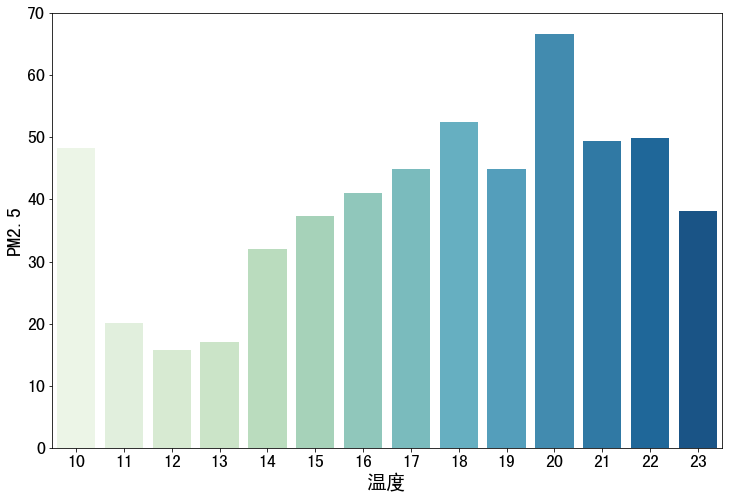

In [27]:
"""不同温度下，对应的PM2.5数值浓度@全数据"""
fig,axis1 = plt.subplots(1,1,figsize=(12,8))
traffic['Temp_int'] = traffic['Temp'].astype(str)
average_value = traffic[['Temp_int','PM2.5']].groupby('Temp_int',as_index=False).mean()
sns.barplot('Temp_int','PM2.5',data=average_value,palette='GnBu')
plt.xlabel(u"温度",fontsize=20)# plots an axis lable
plt.ylabel(u"PM2.5",fontsize=20) 
# plt.axhline(y=35,c='black',ls='-.',lw='2')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
# plt.savefig('不同温度下，对应的PM2.5数值浓度.jpg',dpi=400)

In [28]:
traffic[['Type','Zone']].groupby('Zone').count()

,Type
Zone,
同安,180
思明,3209
湖里,1501
集美,878


In [29]:
traffic_mean = traffic_device[["PM2.5",'Title']].groupby(['Title'],as_index=False).mean()
traffic_mean = traffic_mean.sort_values(by='PM2.5',ascending=False)

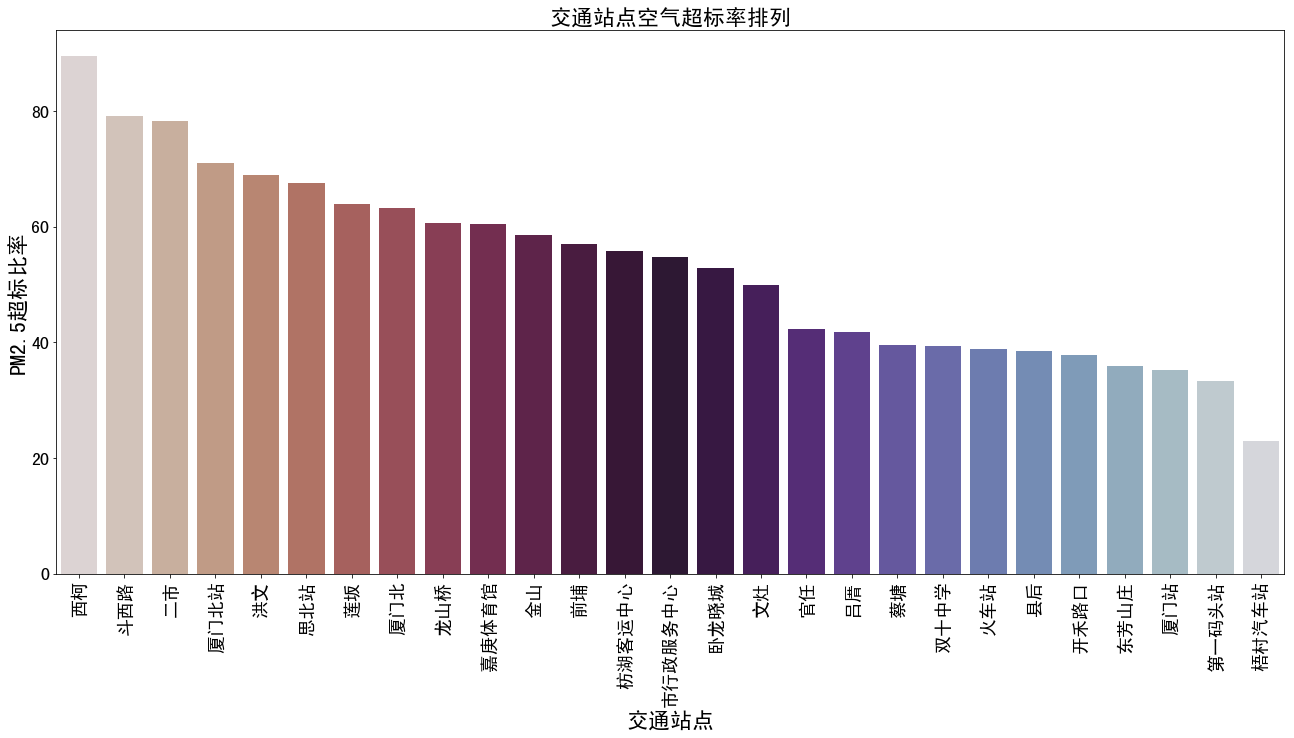

In [30]:
plt.figure(figsize=(22,10))
x= traffic_mean['Title']
y = traffic_mean['PM2.5']
sns.barplot(x,y,palette='twilight_r')
plt.yticks(fontsize=18)
plt.ylabel('PM2.5超标比率',fontsize=22)
plt.xticks(fontsize=18)
plt.title('交通站点空气超标率排列',fontsize=22)
pl.xticks(rotation=90)
plt.xlabel('交通站点',fontsize=22)
# plt.savefig('')
# plt.savefig('交通站点空气超标率排列.jpg',dpi=400)

In [31]:
traffic[['Time_Tags','Zone','PM2.5']].groupby(['Time_Tags','Zone']).mean()

PM2.5
Time_Tags Zone           
Morning   同安    66.866667
          思明    46.657195
          湖里    36.424000
          集美    52.769231
Night     同安    61.443396
          思明    38.329288
          湖里    33.170507
          集美    40.850000
Noon      同安    89.571429
          思明    48.311791
          湖里    37.911429
          集美    46.360294

In [32]:
traffic[['Time_Tags','Zone','PM2.5']].groupby(['Zone','Time_Tags']).mean()

PM2.5
Zone Time_Tags           
同安   Morning    66.866667
     Night      61.443396
     Noon       89.571429
思明   Morning    46.657195
     Night      38.329288
     Noon       48.311791
湖里   Morning    36.424000
     Night      33.170507
     Noon       37.911429
集美   Morning    52.769231
     Night      40.850000
     Noon       46.360294

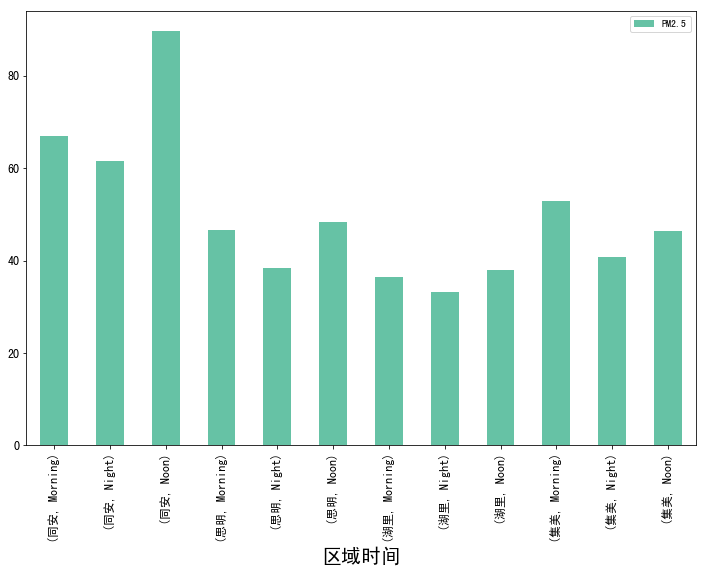

In [33]:
traffic[['Time_Tags','Zone','PM2.5']].groupby(['Zone','Time_Tags']).mean().plot(kind='bar',figsize=(12,8))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('区域时间',fontsize=20)
"""区域时间的数据图特征：均呈现中间低，两端高特点，说明同一站点，夜间的空气质量好于白天【补充原因解释】"""
# plt.savefig('区域时间下PM2.5数值分布.jpg',dpi=400)

## 各区域污染指数前三名，利用subplots绘制

In [34]:
traffic_siming = traffic_device[traffic_device['Zone']=='思明']
traffic_huli = traffic_device[traffic_device['Zone']=='湖里']
traffic_jimei = traffic_device[traffic_device['Zone']=='集美']
traffic_tongan = traffic_device[traffic_device['Zone']=='同安']

In [35]:
siming_mean = traffic_siming[["PM2.5",'Title']].groupby(['Title'],as_index=True).mean().sort_values(by='PM2.5',ascending=False)
siming_mean

,PM2.5
Title,
斗西路,79.125000
二市,78.356589
洪文,68.883041
思北站,67.488095
莲坂,63.960317
龙山桥,60.642857
前埔,57.014925
卧龙晓城,52.840000
文灶,49.925926


In [36]:
huli_mean = traffic_huli[["PM2.5",'Title']].groupby(['Title'],as_index=True).mean().sort_values(by='PM2.5',ascending=False)
huli_mean

,PM2.5
Title,
金山,58.651852
枋湖客运中心,55.800000
市行政服务中心,54.703704
官任,44.000000
吕厝,41.853933
蔡塘,39.511111
双十中学,39.333333
县后,38.488889
东芳山庄,26.777778


In [37]:
jimei_mean = traffic_jimei[["PM2.5",'Title']].groupby(['Title'],as_index=True).mean().sort_values(by='PM2.5',ascending=False)
jimei_mean

,PM2.5
Title,
厦门北站,71.025641
厦门北,63.284091
嘉庚体育馆,60.482759
官任,42.310811


In [38]:
tongan_mean = traffic_tongan[["PM2.5",'Title']].groupby(['Title'],as_index=True).mean().sort_values(by='PM2.5',ascending=False)
tongan_mean

,PM2.5
Title,
西柯,89.544444


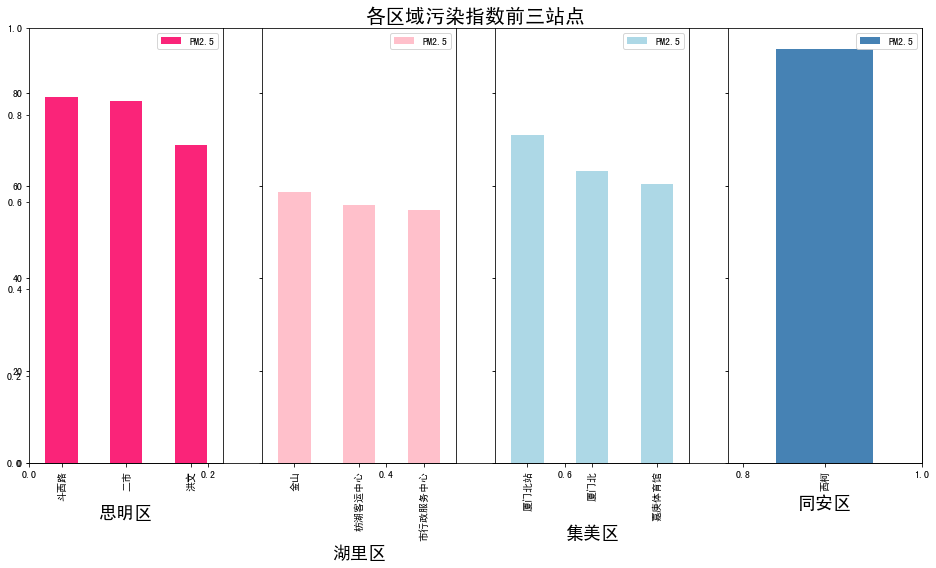

In [39]:

fig=plt.figure(figsize=(16,8))
# fig.set(alpha=0.65) # 设置图像透明度，无所谓
plt.title(u"各区域污染指数前三站点",fontsize=20)

ax1=fig.add_subplot(141)
siming_mean[:3].plot(kind='bar', color='#FA2479',ax=ax1)
ax1.legend([u"PM2.5"], loc='best')
ax1.set_xlabel('思明区',fontsize=18)

ax2=fig.add_subplot(142,sharey=ax1)
huli_mean[:3].plot(kind='bar', color='pink',ax=ax2)
# plt.legend([u"PM2.5"], loc='best')
ax2.set_xlabel('湖里区',fontsize=18)


ax3=fig.add_subplot(143, sharey=ax1)
jimei_mean[:3].plot(kind='bar',color='lightblue',ax=ax3)

# plt.legend([u"男性/高级舱"], loc='best')
ax3.set_xlabel('集美区',fontsize=18)


ax4=fig.add_subplot(144, sharey=ax1)
tongan_mean.plot(kind='bar', color='steelblue',ax=ax4)

# plt.legend([u"男性/低级舱"], loc='best')
ax4.set_xlabel('同安区',fontsize=18)



# plt.savefig('各区域污染指数前三站点.jpg',dpi=400)


## 思明区为例
站点早、中、晚污染次序排列

In [40]:
siming_morning = traffic_device[traffic_device['Zone']=='思明'][traffic_device['Time_Tags']=='Morning']
siming_noon = traffic_device[traffic_device['Zone']=='思明'][traffic_device['Time_Tags']=='Noon']
siming_night = traffic_device[traffic_device['Zone']=='思明'][traffic_device['Time_Tags']=='Night']

In [41]:
siming_morning = siming_morning[['PM2.5','Title']].groupby(['Title'],as_index=True).mean().sort_values('PM2.5',ascending=False)
siming_noon = siming_noon[['PM2.5','Title']].groupby(['Title'],as_index=True).mean().sort_values('PM2.5',ascending=False)
siming_night = siming_night[['PM2.5','Title']].groupby(['Title'],as_index=True).mean().sort_values('PM2.5',ascending=False)


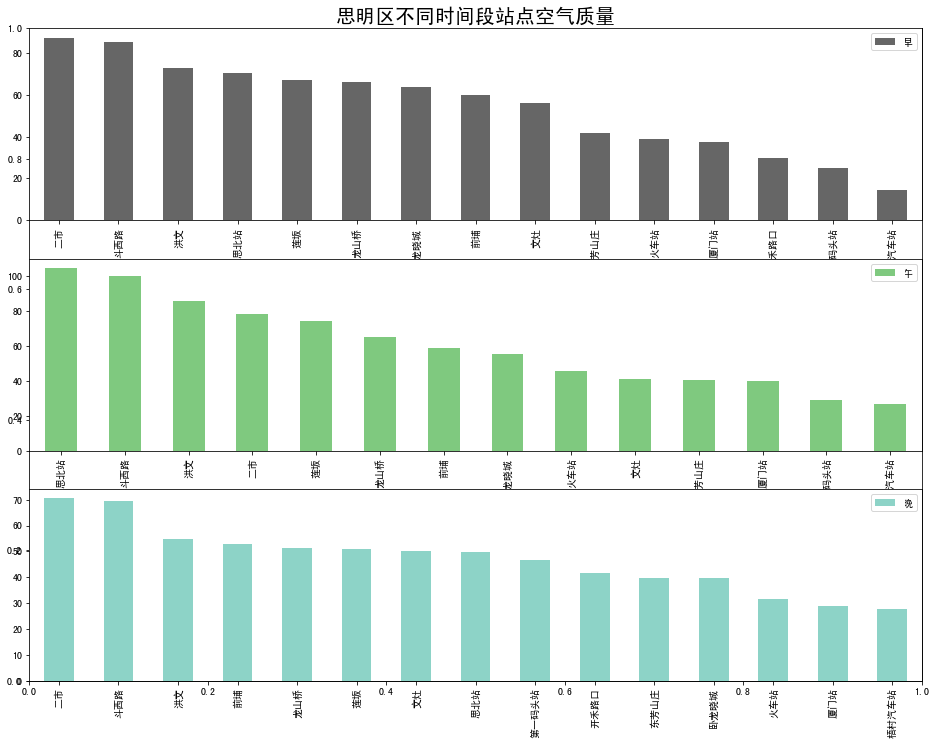

In [42]:
fig=plt.figure(figsize=(16,12))
plt.title(u"思明区不同时间段站点空气质量",fontsize=20)
# plt.xlabel('站点名称',fontsize=18)
ax1=fig.add_subplot(311)
siming_morning.plot(kind='bar',ax=ax1,colormap='Accent_r')
ax1.legend([u"早"], loc='best')

ax2=fig.add_subplot(312)
siming_noon.plot(kind='bar',ax=ax2,colormap='Accent')
ax2.legend([u"午"], loc='best')

ax3=fig.add_subplot(313)
siming_night.plot(kind='bar',ax=ax3,colormap='Set3')
ax3.legend([u"晚"], loc='best')
ax3.set_xlabel('')

# plt.savefig('思明区不同时间段站点空气质量.jpg',dpi=400)

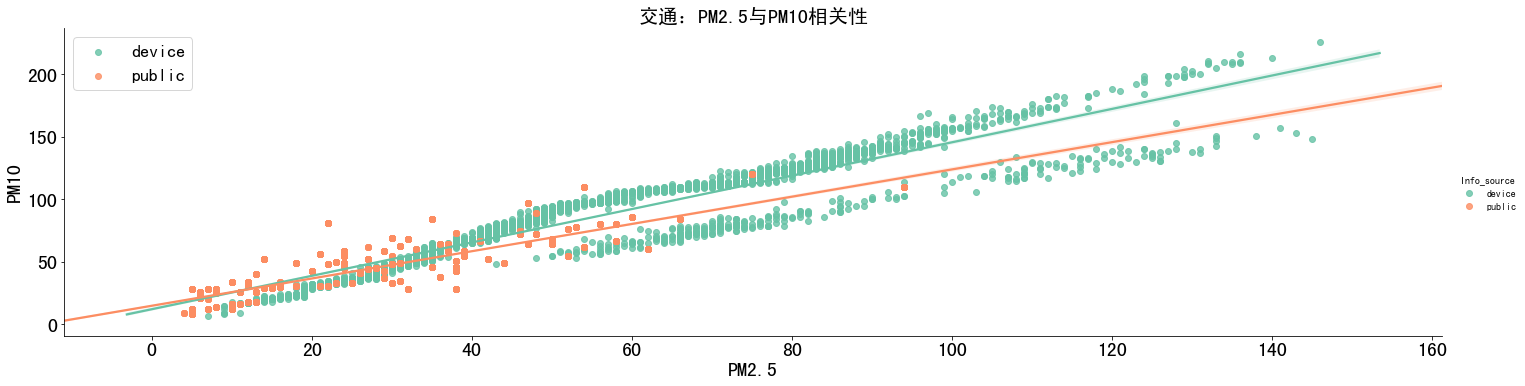

In [43]:
"""对交通数据的PM2.5和PM10的相关性做回归处理"""
# plt.figure(figsize=(18,8))
sns.lmplot(x='PM2.5',y='PM10',data=traffic,hue='Info_source',aspect=4)
plt.xlabel('PM2.5',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=18)
plt.ylabel('PM10',fontsize=20)
plt.title('交通：PM2.5与PM10相关性',fontsize=20)
# plt.savefig('PM2.5与PM10相关性.jpg',dpi=400)

## 4. 特征工程

In [44]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5768 entries, 0 to 5769
Data columns (total 23 columns):
PM2.5              5768 non-null int64
PM10               5768 non-null int64
HCHO               5768 non-null float64
VOC                5768 non-null float64
O3                 5768 non-null object
Temp               5768 non-null int64
Humidity           5768 non-null int64
AQI                5768 non-null int64
Wind_Orient        5768 non-null object
Wind_Level         5768 non-null object
Location           5768 non-null object
Type               5768 non-null object
Zone               5768 non-null object
Date               5768 non-null object
Time               5768 non-null object
Info_source        5768 non-null object
PM2.5_level        5768 non-null object
Temp_Level         5768 non-null object
PM2.5_threshold    5768 non-null object
Time_Tags          5768 non-null object
Day_tags           5768 non-null object
Title              5522 non-null object
Temp_int        

In [45]:
traffic['Title'] = traffic.Title.fillna('U0') # data_df.Title[data_df.Title.isnull()]='U0'

In [46]:
traffic['O3'] = traffic['O3'].convert_objects(convert_numeric=True)
traffic['VOC'] = traffic['VOC'].convert_objects(convert_numeric=True)
traffic['Temp_int'] = traffic['Temp_int'].convert_objects(convert_numeric=True)

In [47]:
traffic['Wind_Orient'] = pd.factorize(traffic['Wind_Orient'])[0]
traffic['Wind_Level'] = pd.factorize(traffic['Wind_Level'])[0]
traffic['Zone'] = pd.factorize(traffic['Zone'])[0]
traffic['Type'] = pd.factorize(traffic['Type'])[0]
traffic['Info_source'] = pd.factorize(traffic['Info_source'])[0]
traffic['PM2.5_level'] = pd.factorize(traffic['PM2.5_level'])[0]
traffic['Temp_Level'] = pd.factorize(traffic['Temp_Level'])[0]
traffic['PM2.5_threshold'] = pd.factorize(traffic['PM2.5_threshold'])[0]
traffic['Time_Tags'] = pd.factorize(traffic['Time_Tags'])[0]
traffic['Day_tags'] = pd.factorize(traffic['Day_tags'])[0]

In [48]:
data_process = traffic.drop(['Location','Date','Title','Temp_int'],axis=1)

In [49]:
data_process.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5768 entries, 0 to 5769
Data columns (total 19 columns):
PM2.5              5768 non-null int64
PM10               5768 non-null int64
HCHO               5768 non-null float64
VOC                5768 non-null float64
O3                 5708 non-null float64
Temp               5768 non-null int64
Humidity           5768 non-null int64
AQI                5768 non-null int64
Wind_Orient        5768 non-null int64
Wind_Level         5768 non-null int64
Type               5768 non-null int64
Zone               5768 non-null int64
Time               5768 non-null object
Info_source        5768 non-null int64
PM2.5_level        5768 non-null int64
Temp_Level         5768 non-null int64
PM2.5_threshold    5768 non-null int64
Time_Tags          5768 non-null int64
Day_tags           5768 non-null int64
dtypes: float64(3), int64(15), object(1)
memory usage: 1.0+ MB


In [50]:
data_process = data_process.rename(columns={'Temp':'温度','Humidity':'湿度','Wind_Orient':'风向','Wind_Level':'风级','Zone':'区域',
                           'PM2.5_level':'PM2.5分级','Temp_Level':'温度分级','PM2.5_threshold':'PM2.5超标阈值',
                             'Time_Tags':'时间区间' })
data_process = data_process.drop(['Type','Info_source','Day_tags'],axis=1)

In [51]:
data_process.columns

Index(['PM2.5', 'PM10', 'HCHO', 'VOC', 'O3', '温度', '湿度', 'AQI', '风向', '风级',
       '区域', 'Time', 'PM2.5分级', '温度分级', 'PM2.5超标阈值', '时间区间'],
      dtype='object')

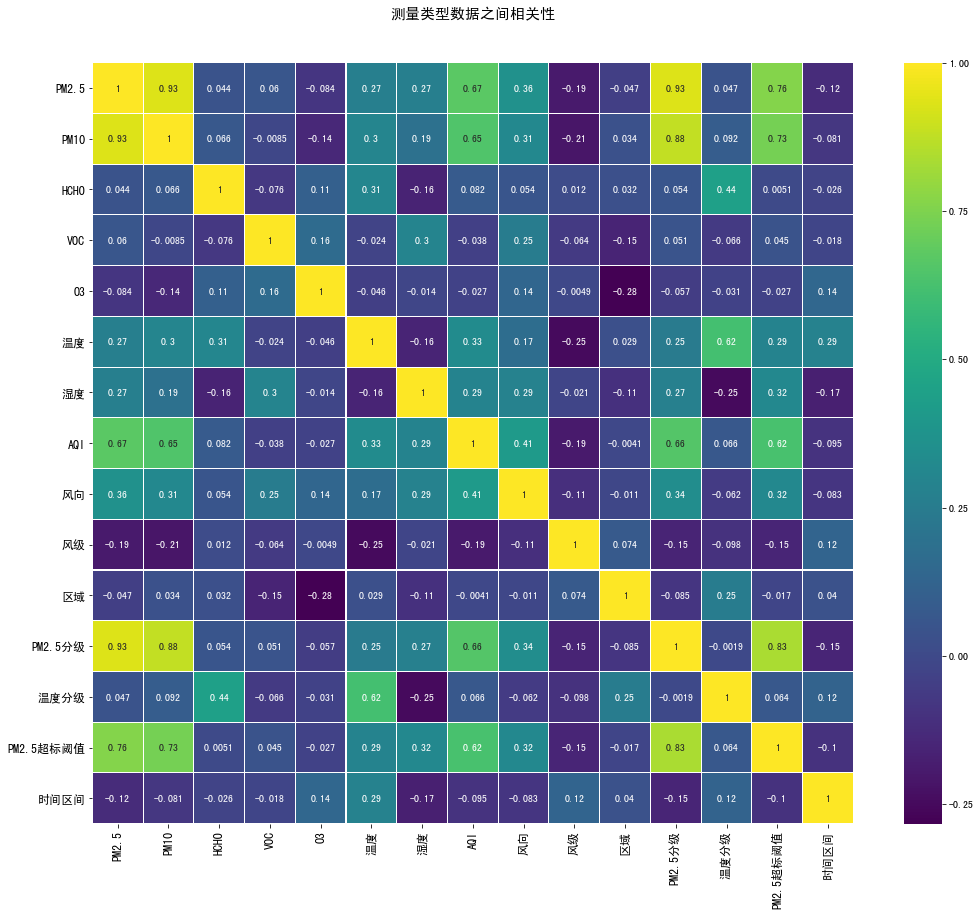

In [52]:
Correlation = pd.DataFrame(data_process[
    ['PM2.5', 'PM10', 'HCHO', 'VOC', 'O3', '温度', '湿度', 'AQI', '风向', '风级',
       '区域',  'PM2.5分级', '温度分级', 'PM2.5超标阈值', '时间区间']])

colormap = plt.cm.viridis
plt.figure(figsize=(18,14))
plt.title('测量类型数据之间相关性', y=1.05, size=15)
sns.heatmap(Correlation.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# plt.savefig('测量类型数据之间相关性.jpg',dpi=800)

# 番外篇

开题报告中提及了研究 VOC\HCHO及PM10,但根据前期分析的结果，VOC\HCHO与测量的时间、站点、区域相关性低

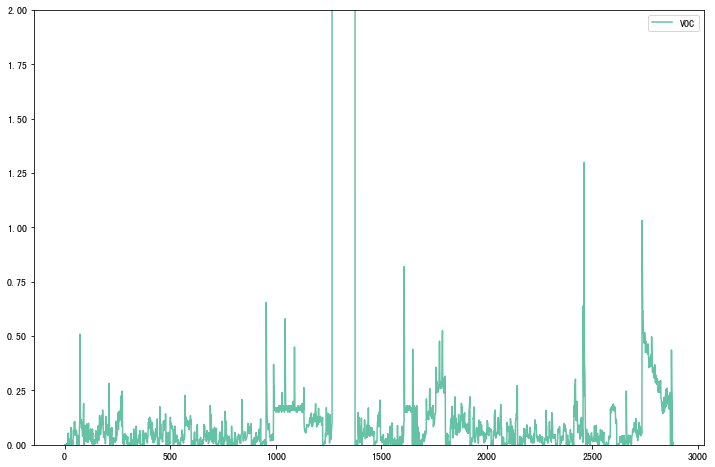

In [53]:
traffic_device[['VOC']].plot(kind='line',figsize=(12,8))
plt.ylim(-0.,2)
# plt.savefig('设备_VOC数值浓度分布.jpg',dpi=400)

In [54]:
traffic_device['VOC'][traffic_device['VOC']>10] = traffic_device.VOC.mean()

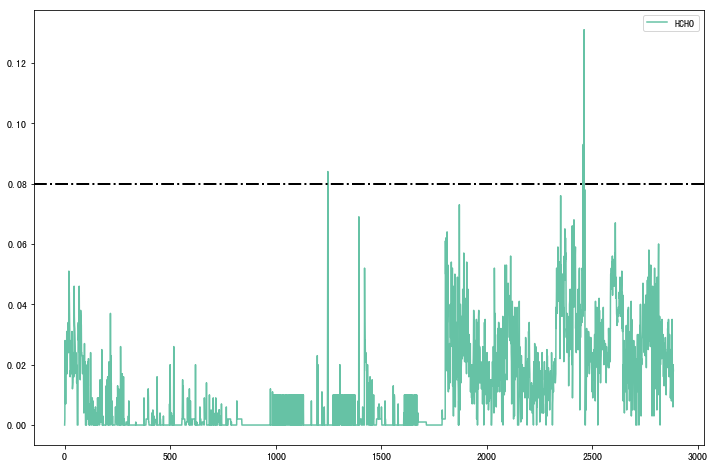

In [55]:
traffic_device[['HCHO']].plot(kind='line',figsize=(12,8))
plt.axhline(y=0.08,c='black',ls='-.',lw='2')
# plt.savefig('设备_HCHO数值浓度分布.jpg',dpi=400)

In [56]:
traffic_device[traffic_device['HCHO']>0.08].T

,1247,2457,2461
PM2.5,49,42,42
PM10,87,75,78
HCHO,0.084,0.093,0.131
VOC,0.145,0.639,1.298
O3,121,100,100
Temp,18,22,22
Humidity,89,69,69
AQI,51,49,49
Wind_Orient,西南风,东北风,东北风
Wind_Level,微风,3-4级,3-4级


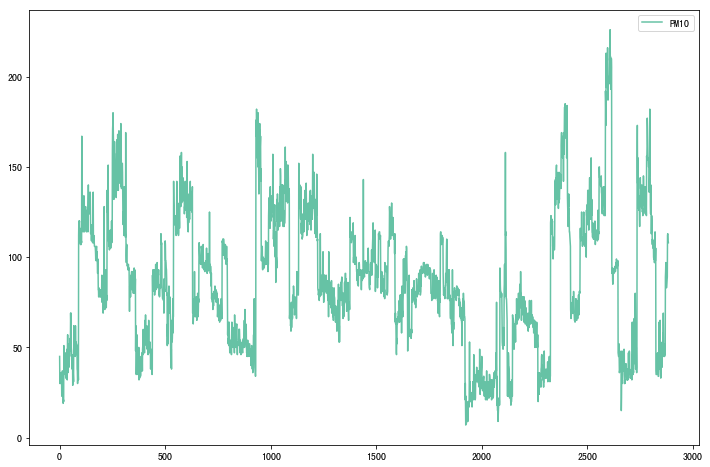

In [57]:
traffic_device[['PM10']].plot(kind='line',figsize=(12,8))
# plt.savefig('设备_PM10数值浓度分布.jpg',dpi=400)

In [58]:
data_df = pd.read_csv('data_df.csv')
data_df = data_df.drop('Unnamed: 0',axis=1)

In [59]:
data_df['Location'].unique()

array(['厦门眼科中心医院', '火车站乘车1', '火车站乘车2', '火车站进站', '梧村汽车站', '厦门站出站口',
       '厦门站售票厅', '厦门市第三医院', '厦门市同安区中医院', '文灶站乘车1', '文灶站乘车2', '文灶站进站',
       '二市站乘车1', '二市站乘车2', '二市站进站', '斗西路站乘车1', '斗西路站乘车2', '斗西路站进站',
       '厦门北站售票厅', '厦门北站进站口', '厦门北站出站口', 'BRT厦门北站出站', 'BRT厦门北站进站',
       '厦门市同安区大嶝医院', '嘉庚体育馆乘车1', '嘉庚体育馆乘车2', '嘉庚体育馆进站', '思北站乘车1',
       '思北站乘车2', '思北站进站', '第一码头乘车', '第一码头进站', '开禾路口站乘车1', '开禾路口站乘车2',
       '开禾路口站进站', '官任站进站', '官任站乘车', '吕厝站乘车', '吕厝站进站', '金山站乘车1', '金山站乘车2',
       '金山站进站', '市行政服务中心站乘车1', '市行政服务中心站乘车2', '市行政服务中心站进站', '龙山桥站乘车1',
       '龙山桥乘车2', '龙山桥进站', '莲坂站乘车1', '莲坂站乘车2', '莲坂站进站', '厦门市第五医院',
       '前埔枢纽站进站', '前埔枢纽站乘车', '洪文站乘车1', '洪文站乘车2', '洪文站进站', '卧龙晓城站乘车1',
       '卧龙晓城站乘车2', '卧龙晓城站进站', '东芳山庄站乘车1', '东芳山庄站乘车2', '东芳山庄站进站', '蔡塘站乘车1',
       '蔡塘站乘车2', '蔡塘站进站', '第一码头站乘车', '第一码头站进站', '厦门站进站口', '龙山桥站乘车2',
       '龙山桥站进站', '前埔站进站', '前埔站乘车', '县后站乘车1', '县后站乘车2', '县后站进站',
       '双十中学站乘车1', '双十中学站乘车2', '双十中学站进站', '嘉庚体育馆站乘车1', '嘉庚体育馆站乘车2',
       '嘉庚体育馆站进站', '火车厦门北站进站', '火车厦门

## 以【莲坂站】为例，测量的点包括：
'莲坂站乘车1', '莲坂站乘车2', '莲坂站进站'

In [60]:
lianban_1 = traffic_device[traffic_device['Location']=='莲坂站乘车1']
lianban_1 = lianban_1[['PM2.5', 'PM10', 'HCHO', 'VOC', 'O3', 'Temp', 'Humidity', 'AQI',
       'Wind_Orient', 'Wind_Level', 'PM2.5_level', 'Temp_Level', 'PM2.5_threshold',
       'Time_Tags']]
lianban_2 = traffic_device[traffic_device['Location']=='莲坂站乘车2']
lianban_2 = lianban_1[['PM2.5', 'PM10', 'HCHO', 'VOC', 'O3', 'Temp', 'Humidity', 'AQI',
       'Wind_Orient', 'Wind_Level', 'PM2.5_level', 'Temp_Level', 'PM2.5_threshold',
       'Time_Tags']]
lianban_3 = traffic_device[traffic_device['Location']=='莲坂站进站']
lianban_3 = lianban_1[['PM2.5', 'PM10', 'HCHO', 'VOC', 'O3', 'Temp', 'Humidity', 'AQI',
       'Wind_Orient', 'Wind_Level', 'PM2.5_level', 'Temp_Level', 'PM2.5_threshold',
       'Time_Tags']]

In [61]:
lianban_3

,PM2.5,PM10,HCHO,VOC,O3,Temp,Humidity,AQI,Wind_Orient,Wind_Level,PM2.5_level,Temp_Level,PM2.5_threshold,Time_Tags
645,42,67,0.002,0.030000,22,15,75,26,东北风,3-4级,Mid,"(10, 20]",above,Morning
646,42,77,0.000,0.006000,22,15,75,26,东北风,3-4级,Mid,"(10, 20]",above,Morning
647,45,78,0.000,0.002000,22,15,75,26,东北风,3-4级,Mid,"(10, 20]",above,Morning
648,42,77,0.000,0.002000,22,15,75,26,东北风,3-4级,Mid,"(10, 20]",above,Morning
649,42,75,0.000,0.002000,22,15,75,26,东北风,3-4级,Mid,"(10, 20]",above,Morning
665,55,97,0.002,0.042000,15,17,74,52,东北风,3-4级,Bad,"(10, 20]",above,Noon
666,57,98,0.002,0.051000,15,17,74,52,东北风,3-4级,Bad,"(10, 20]",above,Noon
667,55,97,0.002,0.037000,15,17,74,52,东北风,3-4级,Bad,"(10, 20]",above,Noon
668,53,96,0.002,0.028000,15,17,74,52,东北风,3-4级,Bad,"(10, 20]",above,Noon
669,55,99,0.002,0.028000,15,17,74,52,东北风,3-4级,Bad,"(10, 20]",above,Noon


In [62]:
lianban = traffic_device[traffic_device['Title']=='莲坂']

In [63]:
lianban.Location.value_counts()

莲坂站乘车2    42
莲坂站乘车1    42
莲坂站进站     42
Name: Location, dtype: int64

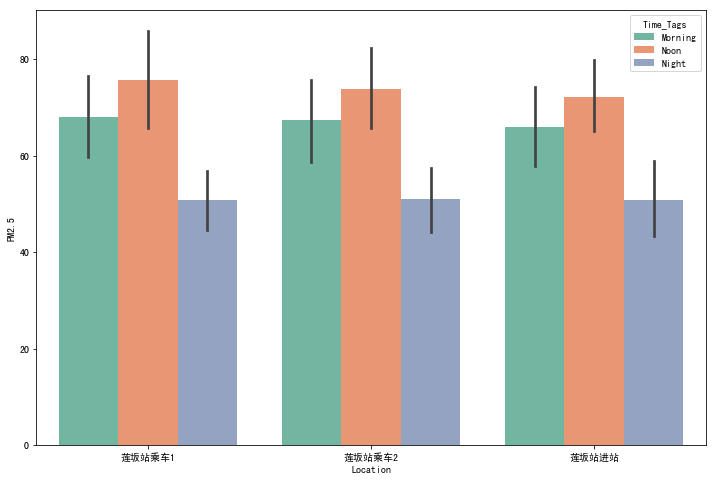

In [64]:
plt.figure(figsize=(12,8))
sns.barplot('Location','PM2.5',hue='Time_Tags',ci=90,data=lianban)
# plt.savefig('莲坂：不同测点不同时间段PM2.5浓度分布.jpg',dpi=400)

In [65]:
lianban[['PM2.5','Location']].groupby('Location').mean()

,PM2.5
Location,
莲坂站乘车1,64.785714
莲坂站乘车2,64.119048
莲坂站进站,62.976190


从上图可以观察出，莲坂站三个测点位置的数据，在同一时间段内的PM2.5浓度变化无差异
且从统计数值上看，分别为64，64，63。该变化均属于仪器误差的范围内，所以，同一站点不同测点不影响数据结果

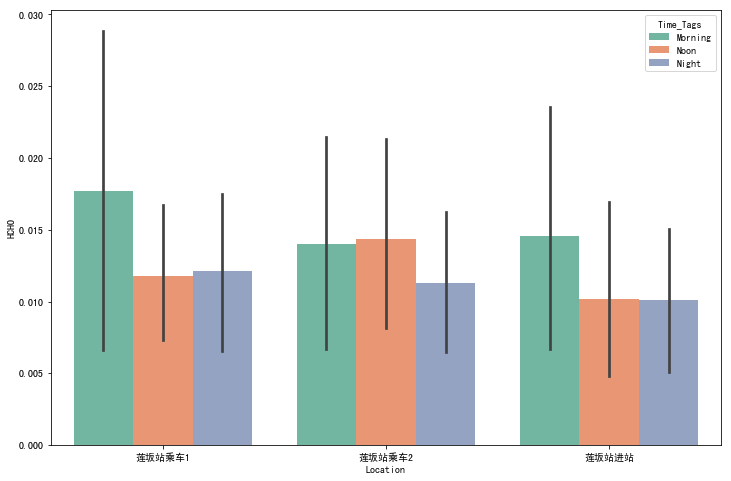

In [66]:
plt.figure(figsize=(12,8))
sns.barplot('Location','HCHO',hue='Time_Tags',ci=90,data=lianban)
# plt.savefig('莲坂：不同测点不同时间段HCHO浓度分布.jpg',dpi=400)

In [67]:
lianban[['HCHO','Location']].groupby('Location').mean()

,HCHO
Location,
莲坂站乘车1,0.013881
莲坂站乘车2,0.013214
莲坂站进站,0.011595


甲醛浓度方面，均为0.01数值区间，甲醛不影响公共空气质量

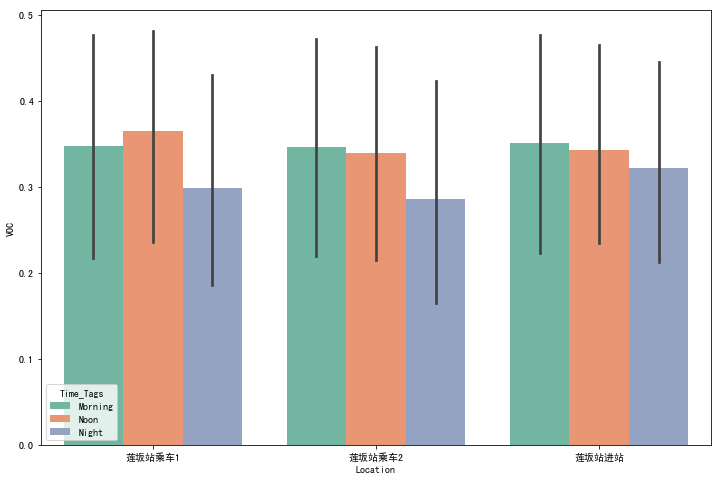

In [68]:
plt.figure(figsize=(12,8))
sns.barplot('Location','VOC',hue='Time_Tags',ci=90,data=lianban)
# plt.savefig('莲坂：不同测点不同时间段VOC浓度分布.jpg',dpi=400)

In [69]:
lianban[['Location','Time_Tags','VOC']].groupby(['Location','Time_Tags']).mean()

VOC
Location Time_Tags          
莲坂站乘车1   Morning    0.347678
         Night      0.298678
         Noon       0.364964
莲坂站乘车2   Morning    0.345964
         Night      0.285678
         Noon       0.339035
莲坂站进站    Morning    0.350892
         Night      0.321607
         Noon       0.343321